In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Loading and preprocessing the dataset

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])

# Dropping the sex column because it does not impact the age of the Abalone
df = df.drop("Sex", axis=1)

# Separating our dataset into input and output variables
X = df.drop("Rings", axis=1).values
y = df["Rings"].values

# Splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the KNN class

In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.sqrt(((self.X_train[:, np.newaxis] - X) ** 2).sum(axis=2))
        k_indices = np.argsort(distances, axis=0)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return stats.mode(k_nearest_labels, axis=0)[0].flatten()

# Function to calculate metrics

In [4]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Function to find the best K

In [5]:
def find_best_k(X_train, y_train, X_test, y_test, k_range):
    best_k = 0
    best_accuracy = 0
    k_results = []

    for k in k_range:
        print(f"Testing K = {k}")
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        
        # Training accuracy
        y_train_pred = knn.predict(X_train)
        train_accuracy, _, _, _ = calculate_metrics(y_train, y_train_pred)
        
        # Test accuracy
        y_test_pred = knn.predict(X_test)
        test_accuracy, precision, recall, f1 = calculate_metrics(y_test, y_test_pred)
        
        k_results.append({
            'k': k,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_k = k

    return best_k, k_results

# Finding the best K

In [6]:
k_range = range(1, 101, 2)
best_k, k_results = find_best_k(X_train, y_train, X_test, y_test, k_range)

# Printing results for each K value
print("\nResults for each K value:")
for result in k_results:
    print(f"K = {result['k']}:")
    print(f"  Training Accuracy: {result['train_accuracy']:.3f}")
    print(f"  Test Accuracy: {result['test_accuracy']:.3f}")
    print(f"  Precision: {result['precision']:.3f}")
    print(f"  Recall: {result['recall']:.3f}")
    print(f"  F1-Score: {result['f1']:.3f}")

print(f"\nBest K: {best_k}")

Testing K = 1
Testing K = 3
Testing K = 5
Testing K = 7
Testing K = 9
Testing K = 11
Testing K = 13
Testing K = 15
Testing K = 17
Testing K = 19
Testing K = 21
Testing K = 23
Testing K = 25
Testing K = 27
Testing K = 29
Testing K = 31
Testing K = 33
Testing K = 35
Testing K = 37
Testing K = 39
Testing K = 41
Testing K = 43
Testing K = 45
Testing K = 47
Testing K = 49
Testing K = 51
Testing K = 53
Testing K = 55
Testing K = 57
Testing K = 59
Testing K = 61
Testing K = 63
Testing K = 65
Testing K = 67
Testing K = 69
Testing K = 71
Testing K = 73
Testing K = 75
Testing K = 77
Testing K = 79
Testing K = 81
Testing K = 83
Testing K = 85
Testing K = 87
Testing K = 89
Testing K = 91
Testing K = 93
Testing K = 95
Testing K = 97
Testing K = 99

Results for each K value:
K = 1:
  Training Accuracy: 1.000
  Test Accuracy: 0.209
  Precision: 0.206
  Recall: 0.209
  F1-Score: 0.206
K = 3:
  Training Accuracy: 0.512
  Test Accuracy: 0.221
  Precision: 0.205
  Recall: 0.221
  F1-Score: 0.207
K = 5:
 

# Training the model with the best K

In [7]:
knn = KNN(k=best_k)
knn.fit(X_train, y_train)

# Predictions and metrics for training set
y_train_pred = knn.predict(X_train)
train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"F1-Score: {train_f1:.3f}")

# Predictions and metrics for test set
y_test_pred = knn.predict(X_test)
test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"F1-Score: {test_f1:.3f}")


Training Set Metrics:
Accuracy: 0.293
Precision: 0.261
Recall: 0.293
F1-Score: 0.258

Test Set Metrics:
Accuracy: 0.289
Precision: 0.258
Recall: 0.289
F1-Score: 0.257


# Plotting the relationship between K and accuracies

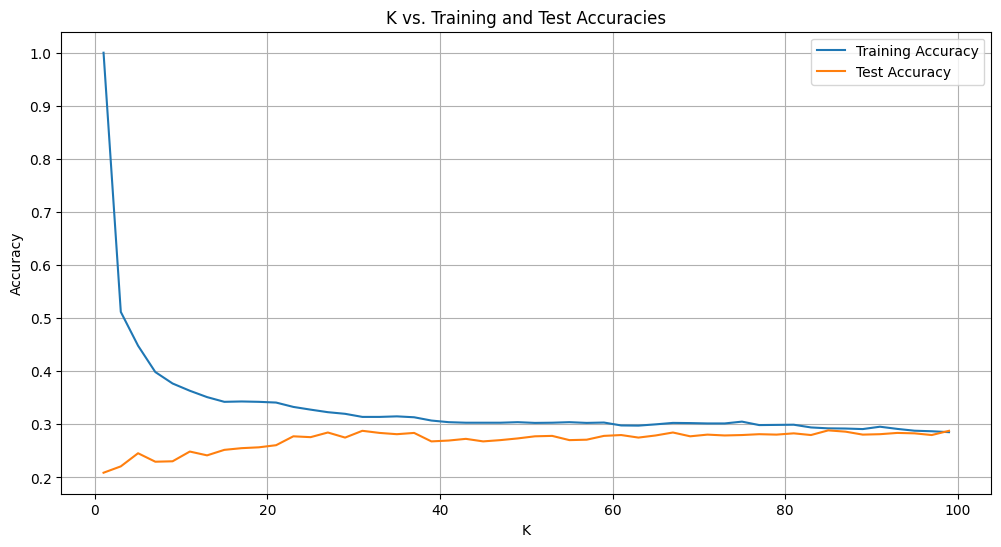

In [8]:
plt.figure(figsize=(12, 6))
plt.plot([result['k'] for result in k_results], [result['train_accuracy'] for result in k_results], label='Training Accuracy')
plt.plot([result['k'] for result in k_results], [result['test_accuracy'] for result in k_results], label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs. Training and Test Accuracies')
plt.legend()
plt.grid(True)
plt.show()

# Save the results to a file

In [9]:
with open('k_values.txt', 'w') as f:
    for result in k_results:
        f.write(f"K = {result['k']}:\n")
        f.write(f"  Training Accuracy: {result['train_accuracy']:.3f}\n")
        f.write(f"  Test Accuracy: {result['test_accuracy']:.3f}\n")
        f.write(f"  Precision: {result['precision']:.3f}\n")
        f.write(f"  Recall: {result['recall']:.3f}\n")
        f.write(f"  F1-Score: {result['f1']:.3f}\n\n")